# The van der Pol Oscillator

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from scipy.integrate import solve_ivp

In [2]:
# Define the function to deliver the r.h.s. of the system
#def f(t,y):
#    return y[1],-y[0]
def f(t,r):
    mu=0.1 #mu=0.1  Stellschraube für Rückkopplung
    x,y=r
    dxdt=y
    dydt=mu*(1-x**2)*y-x
    return dxdt,dydt
# This is the place to insert other DE-Systems. Maybe try van der Pol.

In [19]:
# Integrate dy/dt=f(t,y)
r0=[0.4443542615286089,2.0017635461305257]
t0=0.
t1=10.
dt=0.001
teval=np.linspace(t0,t1,int((t1-t0)/dt+1))
sol=solve_ivp(f, [t0, t1], r0,t_eval=teval)

<IPython.core.display.Javascript object>


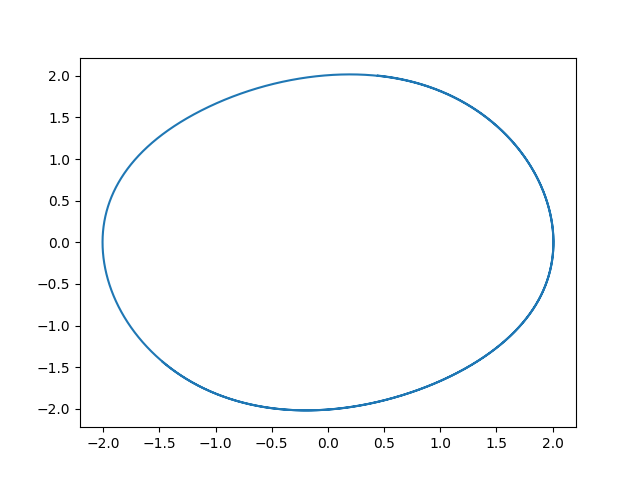

In [20]:
%matplotlib notebook
# plot the solutions curves (x,v)
x=sol.y[0]
v=sol.y[1]
plt.plot(x,v)
#plt.plot(v)

In [21]:
# Calculate the time derivatives of x and v
xdot=np.gradient(x,dt,edge_order=2)
vdot=np.gradient(v,dt,edge_order=2)
t=sol.t

In [22]:
# Define the function xdot and vdot are to be fitted to
def fit(XY,*argv):        # The variable argument *a
    x,v=XY             # Remeber that xdot is in general a function of x and v
    a=np.asarray(argv)
    l=len(a)
    n=int((-1+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    ax=[]
    ay=[]
    for i in np.arange(n+1):
        ax=np.array(np.append(ax,np.ones(n+1-i,dtype=int)*i),dtype=int)
        ay=np.array(np.append(ay,np.arange(n+1-i,dtype=int)),dtype=int)
    for i in np.arange(l): c[ax[i],ay[i]]=a[i]
    return poly.polyval2d(x,v,c)
# And its Jacobian
def jacfit(XY,*argv):
    x,v=XY             # Remeber that xdot is in general a function of x and v
    a=np.asarray(argv)
    l=len(a)
    n=int((-1+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    ax=[0]
    ay=[0]
    for i in np.arange(1,n+1):
        ax=np.array(np.append(ax,np.ones(n+1-i,dtype=int)*i),dtype=int)
        ay=np.array(np.append(ay,np.arange(n+1-i,dtype=int)),dtype=int)
    for i in np.arange(l): c[ax[i],ay[i]]=a[i]
    return poly.polyval2d(x,v,c)
#
# Define the fuction for the integration routine, this is for checking the result, or in the future for
# calculating ahead of the time series and doing a forecast. This function takes two sets of parameters.
# One for xdot and one for vdot, we call it a and b
def func(t,XY,*argv):
    x,v=XY             # Remeber that xdot is in general a function of x and v
    l=len(argv)
    a=np.asarray(argv[:l//2])
    b=np.asarray(argv[l//2:])
    
    n=int((-1//2+np.sqrt(1+8*l//2))//2)
    #print(n)
    ca=np.zeros((n+1,n+1),dtype=float)
    cb=np.zeros((n+1,n+1),dtype=float)
    ax=[]
    ay=[]
    bx=[]
    by=[]
    for i in np.arange(n+1):
        ax=np.array(np.append(ax,np.ones(n+1-i,dtype=int)*i),dtype=int)
        ay=np.array(np.append(ay,np.arange(n+1-i,dtype=int)),dtype=int)        
        bx=np.array(np.append(bx,np.ones(n+1-i,dtype=int)*i),dtype=int)
        by=np.array(np.append(by,np.arange(n+1-i,dtype=int)),dtype=int)
    for i in np.arange(l//2): ca[ax[i],ay[i]]=a[i]
    for i in np.arange(l//2): cb[bx[i],by[i]]=b[i]
    return poly.polyval2d(x,v,ca),poly.polyval2d(x,v,cb)

# Now we check how good is the reprodction by solving the 

In [23]:
%matplotlib notebook
n=3
p0=np.ones((n+1)*(n+2)//2)
XY=np.array([x,v])
#
popt,pcov = curve_fit(fit,(x,v),xdot,p0=p0)
p1=popt
popt,pcov = curve_fit(fit,(x,v),vdot,p0=p0)
p2=popt
params=np.append(p1,p2)
print(p1,p2)

[ 1.78592413e-01  1.00049805e+00 -4.59448194e-02 -1.34638738e-04
  4.19205534e-04  1.00783716e-04  1.57928360e-04 -9.01577839e-05
  2.09040031e-03 -4.42219721e-02] [-5.01049938e-02 -2.98011046e-01  1.44603469e-02  9.85378108e-02
 -6.74292641e-04 -9.98102986e-01  1.13936596e-03 -1.30165300e-02
 -7.35391573e-04  1.29399075e-02]


<IPython.core.display.Javascript object>


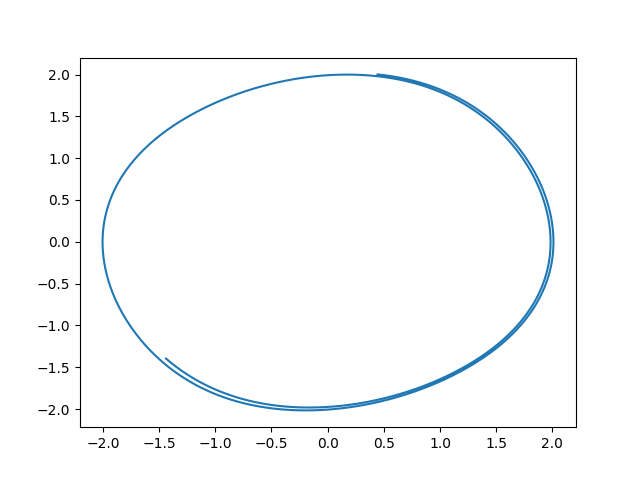

In [24]:
solfit=solve_ivp(func, [t0, t1], r0,t_eval=teval,method='RK45',args=params)
xfit=solfit.y[0]
vfit=solfit.y[1]
plt.plot(xfit,vfit)

# Tadaaah, wen wundert's, dass rauskommt, was man reinsteckt, hehehehe

In [ ]:
# Und jetzt schauen wir noch die Parameter an, so ganz glücklich bin ich damit noch nicht.

In [ ]:
x1=np.linspace(11.,20.,10)
x2=np.linspace(1.,10.,10)
c=np.array([[1,1],[0,0]])
poly.polyval2d(x1,x2,c)

In [ ]:
#
p0=np.ones(10)
teval=np.linspace(0.,10.,100)
x=np.linspace(0.,10.,100)
v=np.linspace(0.,10.,100)
XY=np.array([x,v])
func(t,XY,params)

In [ ]:
params=np.append(p1,p2)
params

In [26]:
ax=[0]
np.append(ax,np.ones(3))

array([0., 1., 1., 1.])